In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

# 1. Load Model

In [2]:
# create an interpreter object that can run TensorFlow Lite model.
interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_thunder_3.tflite')

#ِِِ Allocate memory for the model's input and output tensors.
interpreter.allocate_tensors()

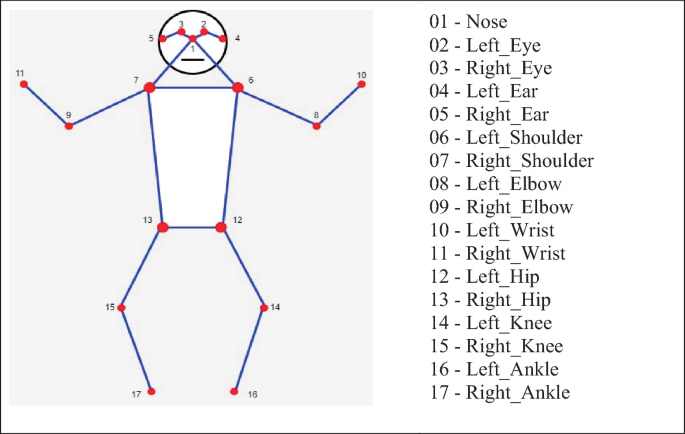

#  Draw Keypoints

In [3]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    # Mapping keypoints to the original image (Scaling Key points)
    y, x, c = frame.shape
    scaled = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for Key_p in scaled:
        Key_y, Key_x, conf = Key_p
        if conf > confidence_threshold:
            cv2.circle(frame, (int(Key_x), int(Key_y)), 4, (244, 247, 30), -1) 

#  Draw Edges

In [4]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

# Draw Connections

In [5]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (185, 45, 204), 2)

In [6]:
KP_List =['nose', 'l_eye', 'r_eye', 'l_ear', 'r_ear', 'l_shoulder', 'r_shoulder','l_elbow', 'r_elbow', 'l_wrist', 'r_wrist', 'l_hip', 'r_hip', 'l_knee','r_knee', 'l_ankle', 'r_ankle']
KP_dict = {}

## Main Key Points

In [7]:

def extract_coordinates(keypoints_with_scores):
    i = 0
    for KP in KP_List : 
        KP_dict[KP] = [keypoints_with_scores[0][0][i][0],keypoints_with_scores[0][0][i][1]]
        i += 1

# Angle Calculation

In [8]:
def Calculate_angle(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1]-b[1] , c[0]-b[0]) - np.arctan2(a[1]-b[1] , a[0]-b[0])
    angle = np.abs (radians*180.0/np.pi)

    if angle > 180.0 :
        angle = 360 - angle 
    return angle

#  Make Detections

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()             # Shape (480, 640, 3)

    # Reshape to a float32 tensor of shape (256 x 256 x 3) 
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 256,256)
    input_image = tf.cast(img, dtype=tf.float32)                                    

    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Make predictions 
    # set the value of the input tensor 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))   
    # triggers the TensorFlow Lite model to process the input and generate the corresponding output.    
    interpreter.invoke()        
    # predicted keypoints along with their corresponding scores.
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    print(keypoints_with_scores)
    

    extract_coordinates(keypoints_with_scores)
    angle =int(Calculate_angle(KP_dict['l_shoulder'],KP_dict['l_elbow'],KP_dict['l_wrist'])) 


    # Rendering 
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    
    cv2.imshow('MoveNet Thunder', frame)
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()

[[[[0.4457933  0.46835497 0.6781377 ]
   [0.39910313 0.50830746 0.8720207 ]
   [0.39270705 0.41857758 0.8333521 ]
   [0.42675287 0.54390776 0.5906749 ]
   [0.42850152 0.35412273 0.86843   ]
   [0.6179532  0.6663899  0.66915905]
   [0.6818712  0.23916328 0.8392031 ]
   [0.8621623  0.7844608  0.0353933 ]
   [0.870216   0.21141797 0.00669399]
   [0.848107   0.6569863  0.08092494]
   [0.85976624 0.39624897 0.09373742]
   [0.9157968  0.6557716  0.00159186]
   [0.93681204 0.3631119  0.0014253 ]
   [0.63414323 0.6746655  0.01861998]
   [0.63006175 0.21066031 0.01041851]
   [0.83768225 0.9691403  0.03270907]
   [0.84002423 0.9698076  0.02124694]]]]
[[[[0.44600028 0.4691488  0.70765555]
   [0.39874148 0.50933    0.87022996]
   [0.39218456 0.4186652  0.8251467 ]
   [0.4260736  0.54505396 0.60825896]
   [0.42791814 0.3538306  0.8650224 ]
   [0.6182249  0.66839236 0.71305376]
   [0.6853288  0.23888734 0.74914765]
   [0.8614377  0.7857465  0.04684773]
   [0.86128545 0.20308049 0.0043832 ]
   [0.852

In [10]:
KP_dict

{'nose': [0.44278032, 0.52340853],
 'l_eye': [0.39904776, 0.5543202],
 'r_eye': [0.39215353, 0.46776843],
 'l_ear': [0.42686483, 0.5656684],
 'r_ear': [0.43029594, 0.38587722],
 'l_shoulder': [0.6102986, 0.6694271],
 'r_shoulder': [0.6596616, 0.25620085],
 'l_elbow': [0.8575543, 0.7918764],
 'r_elbow': [0.87249786, 0.21324539],
 'l_wrist': [0.82492507, 0.9673093],
 'r_wrist': [0.8469404, 0.41484413],
 'l_hip': [0.85060745, 0.9843618],
 'r_hip': [0.93890274, 0.3393517],
 'l_knee': [0.6247401, 0.67054766],
 'r_knee': [0.78887147, 0.45008835],
 'l_ankle': [0.8262931, 0.96918833],
 'r_ankle': [0.7765109, 0.45451063]}

In [11]:
angle

105